# 🖼️🖌️🎨

In [12]:
import pandas as pd
import numpy as np

# Data processing

In [13]:
df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
df1515 = df1515.loc[:,((df1515 !=0).sum() >df1515.shape[0]*0.9 )]
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

# Spearman correlation due to differently distributed features

from scipy.stats import spearmanr
correlation1515 = [(d1_1515, d2_1515, spearmanr(df1515.loc[:,d1_1515], df1515.loc[:,d2_1515])[0]) for d1_1515 in df1515.columns for d2_1515 in df1515.columns]


df1515_2 = pd.DataFrame(correlation1515, columns =["d1_1515", "d2_1515","value1515"])

df1515_3 = df1515_2.pivot_table(index ="d1_1515", columns = "d2_1515", values = "value1515")


# NetworkX 

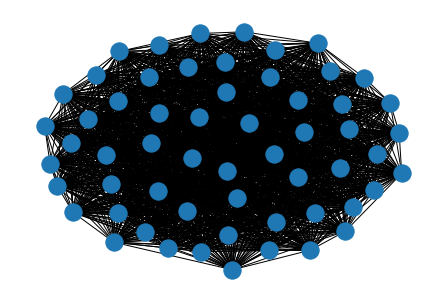

In [14]:
import networkx as nx
import numpy as np


net3 = nx.Graph()
net3 = nx.from_pandas_edgelist(df1515_2, source ="d1_1515", target = "d2_1515", edge_attr = "value1515")

#Remove self loops
net3.remove_edges_from(nx.selfloop_edges(net3))

nx.draw(net3)

## Working import of networkX to pyvis

In [15]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(120)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
Testing = nt.from_nx(nx_graph)
nt.show('nx.html')

# Pyvis import networkx

## Adding a pre-made networkX to processing in pyvis

In [16]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(120)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
Testing = nt.from_nx(nx_graph)
nt.show('nx.html')

## Pyvis from panda df's
- This approach will require that the metabolites have coordinates when adding nodes via this method

In [17]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
net2.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=250, spring_strength=0.001, damping=0.09, overlap=0)
data = df1515_2

sources = data["d1_1515"]
targets = data['d2_1515']
weights = data['value1515']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    net2.add_node(src, src, title=src)
    net2.add_node(dst, dst, title=dst)
    net2.add_edge(src, dst, value=w)

neighbor_map = net2.get_adj_list()

# add neighbor data to node hover data
for node in net2.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net2.toggle_physics(False)
net2.show_buttons(filter_=['physics'])
net2.show('Metabolic_network.html')

# Adding nodes with attributes


### Adding nodes with attributes
- 1. One approach is to create lists from columns from each dataframe and then parse them as values in the script below
   - haha fml pyvis does not support df's, lists or series 🪦🪦🪦🪦🪦🪦

- 2. Create the network in networkX and import it to pyvis via from_nx

   ```python
      import networkx as nx
      import pyvis.network as network

      nx_graph = nx.cycle_graph(10)
      
      network.from_nx(nx_graph)

### Testing processed data with pyvis

In [37]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
net2.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=135000, spring_strength=0.001, damping=0.09, overlap=0)
data = df1515_2

sources = data["d1_1515"]
targets = data['d2_1515']
weights = data['value1515']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
  

    net2.add_node(src, src, title=src )
    net2.add_node(dst, dst, title=dst)
    net2.add_edge(src, dst, value=w)

neighbor_map = net2.get_adj_list()

# add neighbor data to node hover data
for node in net2.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net2.toggle_physics(False)
net2.show_buttons(filter_=['physics'])
net2.show('Metabolic_network.html')

### TESTING BIOCHEMICAL COORDINATES

In [34]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
net2.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=250, spring_strength=0.001, damping=0.09, overlap=0)
data = pd.read_csv("FinalDataPLACEHOLDER.csv") # Make this ok :))))

sources = data["d1_1515"]
targets = data['d2_1515']
weights = data['value1515']
x_coordinates = data["x_coordinates1515"]
y_coordinates = data["y_coordinates1515"]
edge_data = zip(sources, targets, weights, x_coordinates, y_coordinates)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    x_c = e[3]
    y_c = e[4]

    net2.add_node(src, src, x= x_c, y = y_c,  title=src )
    net2.add_node(dst, dst, x = x_c, y = y_c, title=dst)
    net2.add_edge(src, dst, value=w)

neighbor_map = net2.get_adj_list()

# add neighbor data to node hover data
for node in net2.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net2.toggle_physics(False)
net2.show_buttons(filter_=['physics'])
net2.show('Metabolic_network.html')

KeyError: 'x_coordinates1515'

In [ ]:
g = Network()
g.add_nodes([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 100, 0.0],
                         y=[100.2, 23.54, 0.0],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])


g.show("lol.html")

In [33]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut(overlap = 0.9)
got_data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

got_net.add_node(109, "Tyrion", title= "haha")
got_net.add_node(110, "Tyrion", title= "haha",)
got_net.add_edge(src = 110, dst ="Tyrion", w = "100")


neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.toggle_physics(False)
got_net.show_buttons(filter_=['physics'])
got_net.show('gameofthrones.html')

TypeError: add_edge() missing 2 required positional arguments: 'source' and 'to'

In [21]:
got_net.node_ids


['Aemon',
 'Grenn',
 'Samwell',
 'Aerys',
 'Jaime',
 'Robert',
 'Tyrion',
 'Tywin',
 'Alliser',
 'Mance',
 'Amory',
 'Oberyn',
 'Arya',
 'Anguy',
 'Beric',
 'Bran',
 'Brynden',
 'Cersei',
 'Gendry',
 'Gregor',
 'Joffrey',
 'Jon',
 'Rickon',
 'Roose',
 'Sandor',
 'Thoros',
 'Balon',
 'Loras',
 'Belwas',
 'Barristan',
 'Illyrio',
 'Hodor',
 'Jojen',
 'Luwin',
 'Meera',
 'Nan',
 'Theon',
 'Brienne',
 'Bronn',
 'Podrick',
 'Lothar',
 'Walder',
 'Catelyn',
 'Edmure',
 'Hoster',
 'Jeyne',
 'Lysa',
 'Petyr',
 'Robb',
 'Roslin',
 'Sansa',
 'Stannis',
 'Elia',
 'Ilyn',
 'Meryn',
 'Pycelle',
 'Shae',
 'Varys',
 'Craster',
 'Karl',
 'Daario',
 'Drogo',
 'Irri',
 'Daenerys',
 'Aegon',
 'Jorah',
 'Kraznys',
 'Missandei',
 'Rakharo',
 'Rhaegar',
 'Viserys',
 'Worm',
 'Davos',
 'Cressen',
 'Salladhor',
 'Eddard',
 'Eddison',
 'Gilly',
 'Qyburn',
 'Renly',
 'Tommen',
 'Janos',
 'Bowen',
 'Kevan',
 'Margaery',
 'Myrcella',
 'Dalla',
 'Melisandre',
 'Orell',
 'Qhorin',
 'Rattleshirt',
 'Styr',
 'Val',
 